In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
results=pd.read_csv('googleDrive.csv')

In [6]:
results.tail()

,TARGET,UNIVARIATE SARIMA,UNIVARIATE LSTM,MULTIVARIATE XGBOOST,MULTIVARIATE RANDOM FOREST,MULTIVARIATE NEURAL NETWORK,MULTIVARIATE LSTM
47,2,0.950144,1.981509,2,2,2,2
48,1,1.925486,1.981509,2,2,2,2
49,1,1.907718,1.001136,1,1,1,1
50,1,0.921853,1.001136,1,1,1,1
51,1,0.933617,1.001136,1,1,1,1


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [14]:
sqrt(mean_squared_error(results['TARGET'], results['UNIVARIATE LSTM']))

0.9103142353671279

In [13]:
sqrt(mean_squared_error(results['TARGET'], results['UNIVARIATE SARIMA']))

1.4287930880814703

In [16]:
sqrt(mean_squared_error(results['TARGET'], results['MULTIVARIATE LSTM']))

0.9405399431259602

In [17]:
sqrt(mean_squared_error(results['TARGET'], results['MULTIVARIATE NEURAL NETWORK']))

0.8770580193070292

In [15]:
sqrt(mean_squared_error(results['TARGET'], results['MULTIVARIATE XGBOOST']))

1.2480754415067656

In [18]:
sqrt(mean_squared_error(results['TARGET'], results['MULTIVARIATE RANDOM FOREST']))

1.216868616888952

In [2]:
temp = pd.read_excel('Model Dataset_Avg Temp.xlsx')

In [3]:
temp.head()

,Date,LEVEL,WEEK,SEASON,Avg Weekly Temp
0,2009-08-01,1,30,2008-09,65.40
1,2009-08-08,1,31,2008-09,64.48
2,2009-08-15,1,32,2008-09,63.56
3,2009-08-22,1,33,2008-09,62.64
4,2009-08-29,1,34,2008-09,61.72


In [4]:
temp.tail()

,Date,LEVEL,WEEK,SEASON,Avg Weekly Temp
451,2018-03-31,3,12,2017-18,34.08
452,2018-04-07,3,13,2017-18,35.20
453,2018-04-14,4,14,2017-18,41.35
454,2018-04-21,3,15,2017-0,47.50
455,2018-04-28,0,16,0-,53.65


In [5]:
temp.columns

Index(['Date', 'LEVEL', 'WEEK', 'SEASON', 'Avg Weekly Temp'], dtype='object')

In [6]:
temp.dtypes.value_counts()

int64             2
float64           1
object            1
datetime64[ns]    1
dtype: int64

In [7]:
temp.isnull().sum().sort_values(ascending=False).head()

Avg Weekly Temp    0
SEASON             0
WEEK               0
LEVEL              0
Date               0
dtype: int64

In [8]:
race = pd.read_excel('Model Dataset_Race.xlsx')

In [9]:
race.head()

,Date,LEVEL,WEEK,SEASON,"White only, non0Hispanic","Black only, non0Hispanic",Hispanic,"Other or multiple races, non0Hispanic"
0,2009-08-01,1,30,2008-09,0.60,1.7,0.0,0.0
1,2009-08-08,1,31,2008-09,2.06,2.6,0.0,0.0
2,2009-08-15,1,32,2008-09,3.52,3.5,0.0,0.0
3,2009-08-22,1,33,2008-09,4.98,4.4,0.0,0.0
4,2009-08-29,1,34,2008-09,6.44,5.3,0.0,0.0


In [10]:
race.tail()

,Date,LEVEL,WEEK,SEASON,"White only, non0Hispanic","Black only, non0Hispanic",Hispanic,"Other or multiple races, non0Hispanic"
451,2018-03-31,3,12,2017-18,NaN,NaN,NaN,NaN
452,2018-04-07,3,13,2017-18,NaN,NaN,NaN,NaN
453,2018-04-14,4,14,2017-18,NaN,NaN,NaN,NaN
454,2018-04-21,3,15,2017-0,NaN,NaN,NaN,NaN
455,2018-04-28,0,16,0-,NaN,NaN,NaN,NaN


In [11]:
race.columns

Index(['Date', 'LEVEL', 'WEEK', 'SEASON', 'White only, non0Hispanic',
       'Black only, non0Hispanic', 'Hispanic',
       'Other or multiple races, non0Hispanic'],
      dtype='object')

In [12]:
race.dtypes.value_counts()

float64           4
int64             2
object            1
datetime64[ns]    1
dtype: int64

In [13]:
race.isnull().sum().sort_values(ascending=False).head()

Other or multiple races, non0Hispanic    43
Hispanic                                 43
Black only, non0Hispanic                 43
White only, non0Hispanic                 43
SEASON                                    0
dtype: int64

In [14]:
age = pd.read_excel('Model Dataset_Age.xlsx')

In [15]:
age.head()

,Date,LEVEL,WEEK,SEASON,≥6 months,6m-17yrs,18-49 yrs,50-64 yrs,≥65 yrs
0,2009-08-01,1,30,2008-09,7.60,0.90,0.0,0.0,0.90
1,2009-08-08,1,31,2008-09,2.16,2.48,0.0,0.0,3.58
2,2009-08-15,1,32,2008-09,3.52,4.06,0.0,0.0,6.26
3,2009-08-22,1,33,2008-09,4.88,5.64,0.0,0.0,8.94
4,2009-08-29,1,34,2008-09,6.24,7.22,0.0,0.0,11.62


In [16]:
age.tail()

,Date,LEVEL,WEEK,SEASON,≥6 months,6m-17yrs,18-49 yrs,50-64 yrs,≥65 yrs
451,2018-03-31,3,12,2017-18,NaN,NaN,NaN,NaN,NaN
452,2018-04-07,3,13,2017-18,NaN,NaN,NaN,NaN,NaN
453,2018-04-14,4,14,2017-18,NaN,NaN,NaN,NaN,NaN
454,2018-04-21,3,15,2017-0,NaN,NaN,NaN,NaN,NaN
455,2018-04-28,0,16,0-,NaN,NaN,NaN,NaN,NaN


In [17]:
age.columns

Index(['Date', 'LEVEL', 'WEEK', 'SEASON', '≥6 months', '6m-17yrs', '18-49 yrs',
       '50-64 yrs', '≥65 yrs'],
      dtype='object')

In [18]:
age.dtypes.value_counts()

float64           5
int64             2
object            1
datetime64[ns]    1
dtype: int64

In [19]:
age.isnull().sum().sort_values(ascending=False).head()

≥65 yrs      43
50-64 yrs    43
18-49 yrs    43
6m-17yrs     43
≥6 months    43
dtype: int64

In [20]:
data=temp.merge(age.select_dtypes(exclude=['int64', 'object']), on='Date')

In [21]:
data=data.merge(race.select_dtypes(exclude=['int64', 'object']), on='Date')

In [22]:
data=data.select_dtypes(exclude=['object'])

In [23]:
data.tail()

,Date,LEVEL,WEEK,Avg Weekly Temp,≥6 months,6m-17yrs,18-49 yrs,50-64 yrs,≥65 yrs,"White only, non0Hispanic","Black only, non0Hispanic",Hispanic,"Other or multiple races, non0Hispanic"
451,2018-03-31,3,12,34.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,2018-04-07,3,13,35.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,2018-04-14,4,14,41.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,2018-04-21,3,15,47.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,2018-04-28,0,16,53.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
plot=data.drop('Date', 1)

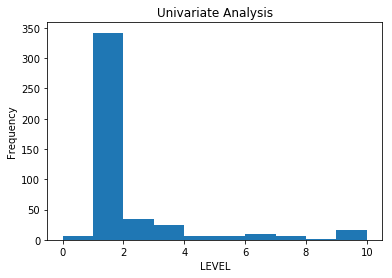

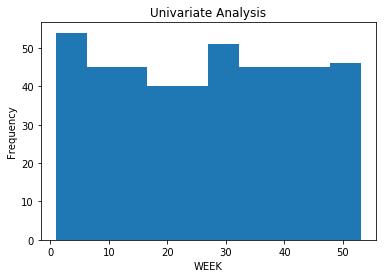

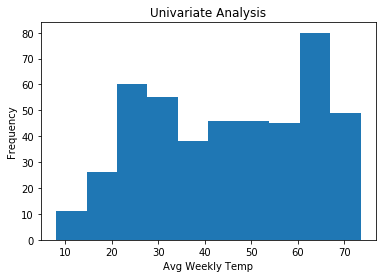

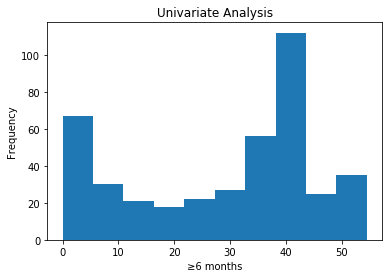

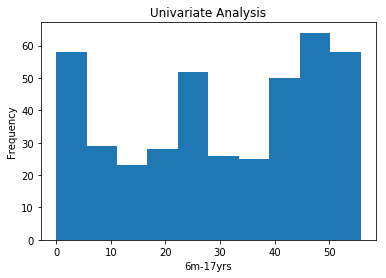

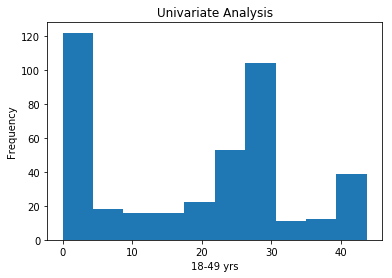

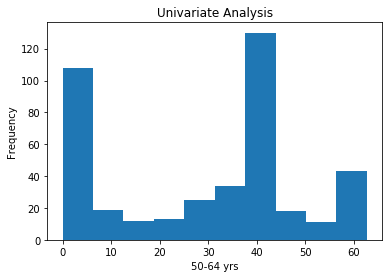

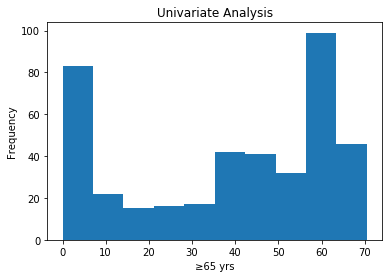

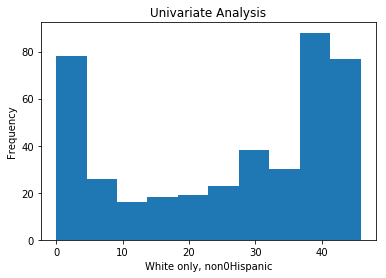

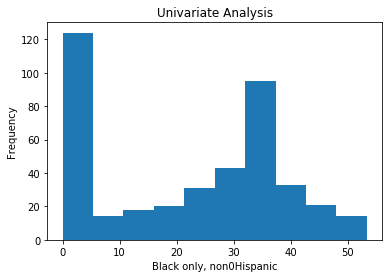

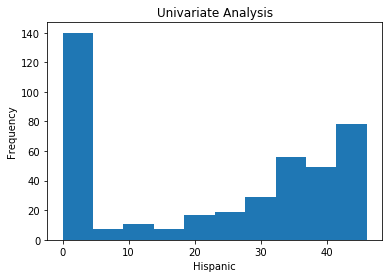

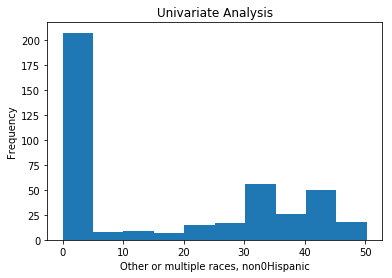

In [25]:
for i, col in enumerate(plot.columns):
    plt.figure(i)
    plt.hist(plot[col].dropna())
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.title('Univariate Analysis')
    plt.show()

In [41]:
X, y = plot.iloc[:,1:],plot.iloc[:,0]

In [42]:
#from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)
#dummy_y = np_utils.to_categorical(encoded_Y)

In [43]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [45]:
model = xgb.XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
actual = [round(value) for value in y_test]

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [46]:
from sklearn.metrics import accuracy_score, mean_squared_error
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.33%


In [47]:
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

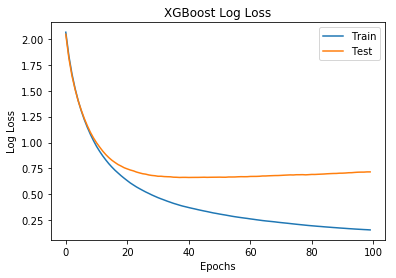

In [48]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()

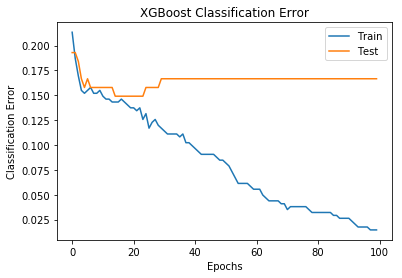

In [49]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

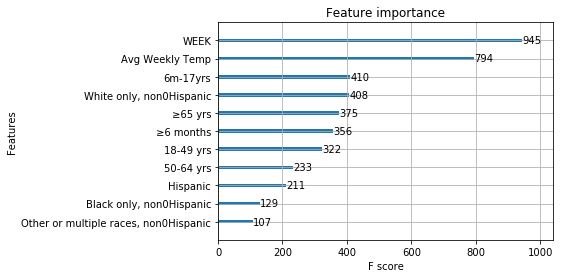

In [50]:
xgb.plot_importance(model)

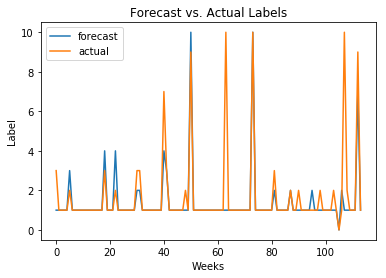

In [51]:
plt.plot(predictions, label='forecast')
plt.plot(actual, label='actual')
plt.legend()
plt.ylabel('Label')
plt.xlabel('Weeks')
plt.title('Forecast vs. Actual Labels')
plt.show()

In [52]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2, missing='drop')
est2 = est.fit()
est2.pvalues.sort_values().head()

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


const                                    0.000006
Avg Weekly Temp                          0.001883
WEEK                                     0.023650
Other or multiple races, non0Hispanic    0.024931
≥65 yrs                                  0.129051
dtype: float64

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
temp1=temp[['LEVEL', 'WEEK', 'Avg Weekly Temp']]

In [5]:
dataset = temp1.values
X = dataset[:,1:3].astype(float)
Y = dataset[:,0]

In [6]:
def baseline_model():
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(11, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)

In [8]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=13)

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold, verbose=2)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [20]:
newdata=pd.read_csv('StateDatabySeason58_57,56,55,54,53,52,51,50,49,48.csv')

In [21]:
mi=newdata.loc[newdata['STATENAME'] == 'Michigan']

In [22]:
from datetime import datetime
mi['WEEKEND']=pd.to_datetime(mi['WEEKEND'], format="%b-%d-%Y")

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
mi.sort_values("WEEKEND", inplace=True)

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
mi.tail(30)

,STATENAME,URL,WEBSITE,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND,WEEK,SEASON
22358,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 3,Minimal,2018-04-07,14,2017-18
21027,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 2,Minimal,2018-04-14,15,2017-18
9688,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 1,Minimal,2018-04-21,16,2017-18
9704,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 1,Minimal,2018-04-28,17,2017-18
9657,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 1,Minimal,2018-05-05,18,2017-18
9648,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 1,Minimal,2018-05-12,19,2017-18
9598,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 1,Minimal,2018-05-19,20,2017-18
9552,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 1,Minimal,2018-05-26,21,2017-18
9512,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 1,Minimal,2018-06-02,22,2017-18
9477,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,Level 1,Minimal,2018-06-09,23,2017-18


In [25]:
mi['WEEK'].value_counts()

43    11
42    11
41    11
40    11
27    10
12    10
22    10
21    10
20    10
19    10
18    10
17    10
16    10
15    10
14    10
13    10
10    10
11    10
24    10
9     10
8     10
7     10
6     10
5     10
4     10
3     10
2     10
23    10
1     10
25    10
26    10
51    10
50    10
49    10
48    10
47    10
46    10
45    10
44    10
39    10
38    10
37    10
36    10
35    10
34    10
33    10
32    10
31    10
30    10
29    10
28    10
52    10
53     2
Name: WEEK, dtype: int64

In [26]:
mi = mi[mi.WEEK != 53]

In [27]:
mi['ACTIVITY LEVEL']=mi['ACTIVITY LEVEL'].str.extract('(\d+)').astype(int)

In [10]:
mi.to_excel('output.xlsx', index=False)

In [31]:
values

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 5.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 6.],
       [ 3.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ACTIVITY LEVEL

In [32]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load
dataframe = pd.read_excel('output.xlsx', usecols=[3])
values = dataframe.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.tail())

NameError: name 'DataFrame' is not defined

In [614]:
# split into train and test sets
values = reframed.values
nt = len(reframed) - 52
train = values[:nt, :]
test = values[nt:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(471, 1, 1) (471,) (52, 1, 1) (52,)


In [615]:
model = Sequential()
model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(train_X, train_y, epochs=1000, batch_size=52, verbose=0, shuffle=False,)

KeyboardInterrupt: 

In [ ]:
import math
from sklearn.metrics import accuracy_score, mean_squared_error
# make predictions
trainPredict = model.predict(train_X, batch_size=1)
testPredict = model.predict(test_X, batch_size=1)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_y])
# calculate root mean squared
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' % (testScore))

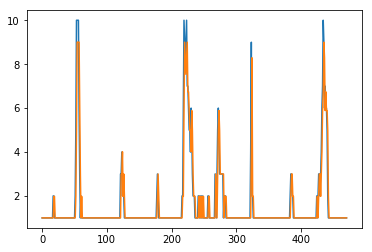

In [608]:
plt.plot(trainY[0])
plt.plot(trainPredict[:,0])

In [609]:
tsmIn=pd.DataFrame(trainY[0])

In [610]:
tsmOut=pd.DataFrame(trainPredict[:,0])

In [611]:
tsmTest=pd.merge(tsmIn, tsmOut, right_index=True, left_index=True)

In [612]:
tsmTest.to_csv('tsmtrain.csv', index=False)

In [597]:
len(testY[0])

52

In [599]:
len(train_X)

471

In [33]:
dataframe = pd.read_excel('output.xlsx', usecols=[3])
dataset = dataframe.values
dataset = dataset.astype('float32')

In [34]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [35]:
# split into train and test sets
train_size = (len(dataset) - 52)
test_size = 52
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

472 52


In [36]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [37]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [38]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [40]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

In [41]:
import math
from sklearn.metrics import accuracy_score, mean_squared_error
# make predictions
trainPredict = model.predict(trainX, batch_size=1)
testPredict = model.predict(testX, batch_size=1)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' % (testScore))

Test RMSE: 0.99 RMSE


In [42]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

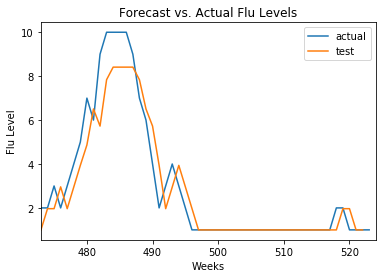

In [43]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='actual')
#plt.plot(trainPredictPlot, label='train')
plt.plot(testPredictPlot, label='test')
plt.xlabel('Weeks')
plt.ylabel('Flu Level')
plt.title('Forecast vs. Actual Flu Levels')
plt.legend(loc='best')
plt.xlim(len(train)+1,len(dataset))
plt.show()

In [190]:
lstmTrainIn=pd.DataFrame(trainY[0])

In [191]:
lstmTrainOut=pd.DataFrame(trainPredict[:,0])

In [192]:
lstmIn=pd.DataFrame(testY[0])

In [193]:
lstmOut=pd.DataFrame(testPredict[:,0])

In [194]:
lstmPut=pd.merge(lstmIn, lstmOut, right_index=True, left_index=True)

In [195]:
lstmPut.to_csv('lstmTest1.csv', index=False)

In [196]:
lstmPutTr=pd.merge(lstmTrainIn, lstmTrainOut, right_index=True, left_index=True)

In [198]:
lstmPutTr.to_csv('lstmTrain1.csv', index=False)

In [44]:
temp1=pd.read_csv('1531407.csv', parse_dates=[2], infer_datetime_format=True)

In [45]:
temp1=temp1[['DATE', 'TMIN', 'TMAX']]

In [46]:
temp1=temp1.rename(index=str, columns={"DATE": "WEEKEND"})

In [47]:
tempAdd=pd.merge(temp1, mi, on='WEEKEND', how='inner')

In [48]:
tempAdd

,WEEKEND,TMIN,TMAX,STATENAME,URL,WEBSITE,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEK,SEASON
0,2008-10-04,31,59,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,40,2008-09
1,2008-10-11,39,74,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,41,2008-09
2,2008-10-18,35,57,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,42,2008-09
3,2008-10-25,42,51,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,43,2008-09
4,2008-11-01,34,59,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,44,2008-09
5,2008-11-08,37,45,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,45,2008-09
6,2008-11-15,34,48,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,46,2008-09
7,2008-11-22,17,32,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,47,2008-09
8,2008-11-29,20,42,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,48,2008-09
9,2008-12-06,15,29,Michigan,http://www.michigan.gov/mdch/0%2C1607%2C7-132-...,Influenza Activity and Surveillance,1,Minimal,49,2008-09


In [49]:
tempAdd=tempAdd[['ACTIVITY LEVEL', 'WEEK', 'TMIN', 'TMAX']]

In [50]:
tempAdd

,ACTIVITY LEVEL,WEEK,TMIN,TMAX
0,1,40,31,59
1,1,41,39,74
2,1,42,35,57
3,1,43,42,51
4,1,44,34,59
5,1,45,37,45
6,1,46,34,48
7,1,47,17,32
8,1,48,20,42
9,1,49,15,29


In [51]:
dsd = pd.concat([tempAdd, tempAdd['ACTIVITY LEVEL'].shift(-1).rename('next level')], axis=1)

In [52]:
dsd=dsd[:-1]

In [53]:
dsd

,ACTIVITY LEVEL,WEEK,TMIN,TMAX,next level
0,1,40,31,59,1.0
1,1,41,39,74,1.0
2,1,42,35,57,1.0
3,1,43,42,51,1.0
4,1,44,34,59,1.0
5,1,45,37,45,1.0
6,1,46,34,48,1.0
7,1,47,17,32,1.0
8,1,48,20,42,1.0
9,1,49,15,29,1.0


In [54]:
X, y = dsd.iloc[:,:4],dsd.iloc[:,4]

In [55]:
X

,ACTIVITY LEVEL,WEEK,TMIN,TMAX
0,1,40,31,59
1,1,41,39,74
2,1,42,35,57
3,1,43,42,51
4,1,44,34,59
5,1,45,37,45
6,1,46,34,48
7,1,47,17,32
8,1,48,20,42
9,1,49,15,29


In [56]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [57]:
52/len(X)

0.0994263862332696

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=52/len(X), random_state=10, shuffle=False)

In [59]:
len(X_train)

471

In [60]:
len(X_test)

52

In [61]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train, verbose=False)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
actual = [round(value) for value in y_test]

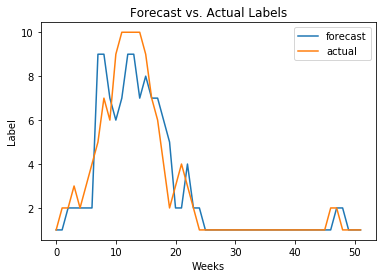

In [62]:
plt.plot(predictions, label='forecast')
plt.plot(actual, label='actual')
plt.legend()
plt.ylabel('Label')
plt.xlabel('Weeks')
plt.title('Forecast vs. Actual Labels')
plt.show()

In [63]:
sqrt(mean_squared_error(predictions, actual))

1.2480754415067656

In [333]:
xIn=pd.DataFrame(actual)

In [334]:
xOut=pd.DataFrame(predictions)

In [337]:
jj=pd.merge(xIn, xOut, right_index=True, left_index=True)
jj.to_csv('xgbOutTe.csv', index=False)

In [338]:
x_pred = model.predict(X_train)

In [339]:
predictionsX = [round(value) for value in x_pred]
actualX = [round(value) for value in y_train]

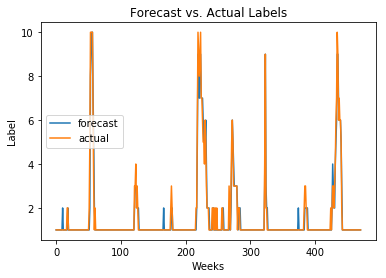

In [340]:
plt.plot(predictionsX, label='forecast')
plt.plot(actualX, label='actual')
plt.legend()
plt.ylabel('Label')
plt.xlabel('Weeks')
plt.title('Forecast vs. Actual Labels')
plt.show()

In [341]:
xtrainIn=pd.DataFrame(actualX)

In [342]:
xtrainOut=pd.DataFrame(predictionsX)

In [344]:
kj=pd.merge(xtrainIn, xtrainOut, right_index=True, left_index=True)
kj.to_csv('xgbOutTrr.csv', index=False)

In [61]:
from math import sqrt
from sklearn.metrics import mean_squared_error

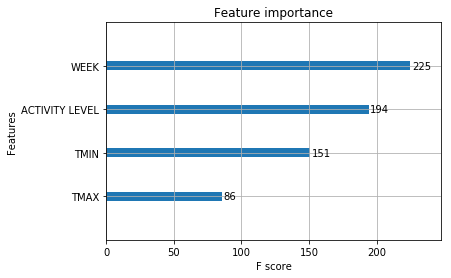

In [62]:
xgb.plot_importance(model)

In [401]:
from sklearn.ensemble import RandomForestRegressor

In [402]:
regr = RandomForestRegressor(random_state=10)

In [403]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [404]:
y_pred=regr.predict(X_test)

In [405]:
predictions = [round(value) for value in y_pred]
actual = [round(value) for value in y_test]

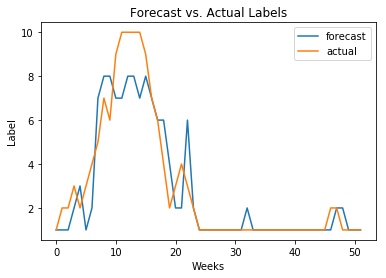

In [406]:
plt.plot(predictions, label='forecast')
plt.plot(actual, label='actual')
plt.legend()
plt.ylabel('Label')
plt.xlabel('Weeks')
plt.title('Forecast vs. Actual Labels')
plt.show()

In [407]:
sqrt(mean_squared_error(predictions, actual))

1.216868616888952

In [408]:
rfIn=pd.DataFrame(actual)

In [409]:
rfOut=pd.DataFrame(predictions)

In [410]:
kk=pd.merge(rfIn, rfOut, right_index=True, left_index=True)
kk.to_csv('rfOutTe.csv', index=False)

In [411]:
x_pred=regr.predict(X_train)

In [412]:
predictionsX = [round(value) for value in x_pred]
actualX = [round(value) for value in y_train]

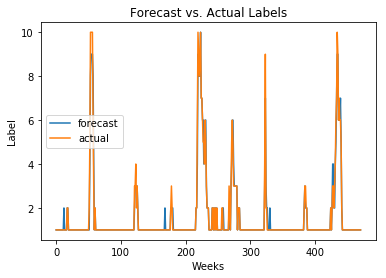

In [413]:
plt.plot(predictionsX, label='forecast')
plt.plot(actualX, label='actual')
plt.legend()
plt.ylabel('Label')
plt.xlabel('Weeks')
plt.title('Forecast vs. Actual Labels')
plt.show()

In [414]:
rfInTr=pd.DataFrame(actualX)

In [415]:
rfOutTr=pd.DataFrame(predictionsX)

In [416]:
kdk=pd.merge(rfInTr, rfOutTr, right_index=True, left_index=True)
kdk.to_csv('rfOutTr.csv', index=False)

In [64]:
# configure network
n_batch = 1
n_epoch = 100
n_neurons = 2
# design network
model = Sequential()
model.add(LSTM(n_neurons, batch_input_shape=(n_batch, trainX.shape[1], trainX.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
for i in range(n_epoch):
	model.fit(trainX, trainY, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
	model.reset_states()
# online forecast
predictions = list()
actuals = list()
for i in range(52):
	testx, testy = testX[i], testY[i]
	testx = testx.reshape(1, 1, 1)
	yhat = model.predict(testx, batch_size=1)
	print('>Expected=%.1f, Predicted=%.1f' % (testy, yhat))
	predictions.append(yhat)
	actuals.append(testy)    

ValueError: Error when checking target: expected dense_2 to have shape (1,) but got array with shape (470,)

In [380]:
X

,ACTIVITY LEVEL,WEEK,TMIN,TMAX
0,1,40,31,59
1,1,41,39,74
2,1,42,35,57
3,1,43,42,51
4,1,44,34,59
5,1,45,37,45
6,1,46,34,48
7,1,47,17,32
8,1,48,20,42
9,1,49,15,29


In [65]:
from keras.wrappers.scikit_learn import KerasRegressor

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(2, input_dim=4, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [68]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=1, verbose=0, shuffle=False)

In [69]:
estimator.fit(X_train, y_train)

In [74]:
y_pred=estimator.predict(X_test)

In [75]:
predictions = [round(value) for value in y_pred]
actual = [round(value) for value in y_test]

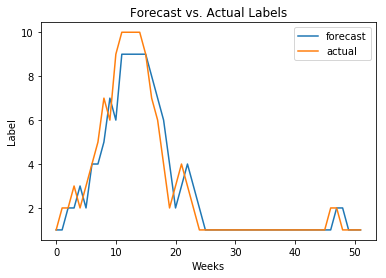

In [76]:
plt.plot(predictions, label='forecast')
plt.plot(actual, label='actual')
plt.legend()
plt.ylabel('Label')
plt.xlabel('Weeks')
plt.title('Forecast vs. Actual Labels')
plt.show()

In [77]:
sqrt(mean_squared_error(predictions, actual))

0.8770580193070292

In [564]:
nnin=pd.DataFrame(actual)

In [565]:
nnout=pd.DataFrame(predictions)

In [566]:
nnn=pd.merge(nnin, nnout, right_index=True, left_index=True)

In [567]:
nnn.to_csv('nnnnTrain.csv', index=False)

In [ ]:
kdk=pd.merge(rfInTr, rfOutTr, right_index=True, left_index=True)
kdk.to_csv('rfOutTr.csv', index=False)

In [435]:
import numpy
import pandas

In [436]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [545]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load
values = tempAdd.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.tail())

     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
519   0.111111   0.725490   0.670213   0.588889  0.111111
520   0.111111   0.745098   0.617021   0.600000  0.000000
521   0.000000   0.764706   0.819149   0.733333  0.000000
522   0.000000   0.784314   0.606383   0.488889  0.000000
523   0.000000   0.803922   0.574468   0.533333  0.000000


In [541]:
# split into train and test sets
values = reframed.values
nt = len(reframed) - 52
train = values[:nt, :]
test = values[nt:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(471, 1, 1) (471,) (52, 1, 1) (52,)


In [542]:
model = Sequential()
model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(train_X, train_y, epochs=1000, batch_size=52, verbose=0, shuffle=False,)

In [1]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

NameError: name 'model' is not defined

In [543]:

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

ValueError: non-broadcastable output operand with shape (52,1) doesn't match the broadcast shape (52,4)

In [ ]:
# calculate RMSE
inv_yhat = [round(value) for value in inv_yhat]
inv_y = [round(value) for value in inv_y]
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
plt.plot(inv_yhat, label='forecast')
plt.plot(inv_y, label='actual')
plt.legend()
plt.ylabel('Label')
plt.xlabel('Weeks')
plt.title('Forecast vs. Actual Labels')
plt.show()

In [520]:
lstmMin=pd.DataFrame(inv_y)

In [521]:
lstmMout=pd.DataFrame(inv_yhat)

In [522]:
lstmM=pd.merge(lstmMin, lstmMout, right_index=True, left_index=True)

In [523]:
lstmM.to_csv('lstmMtr.csv', index=False)

In [513]:
# make a prediction
yhat = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, train_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_y = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [514]:
# calculate RMSE
inv_yhat = [round(value) for value in inv_yhat]
inv_y = [round(value) for value in inv_y]
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.791


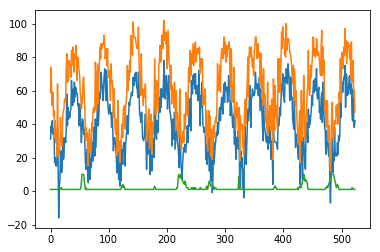

In [42]:
plt.plot(tempAdd['TMIN'])
plt.plot(tempAdd['TMAX'])
plt.plot(tempAdd['ACTIVITY LEVEL'])

In [47]:
tempAdd.sort_values("ACTIVITY LEVEL", inplace=True)

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
tempAdd

,WEEKEND,ACTIVITY LEVEL,WEEK,SEASON,ACTIVITY LEVEL LABEL,TMIN,TMAX
109,2010-11-13,1,45,2010-11,Minimal,30,61
287,2014-04-12,1,15,2013-14,Minimal,41,76
48,2009-09-12,1,36,2009-10,Minimal,52,76
414,2016-09-24,1,38,2015-16,Minimal,55,76
308,2014-09-06,1,36,2013-14,Minimal,60,76
509,2018-07-21,1,29,2017-18,Minimal,69,76
84,2010-05-22,1,20,2009-10,Minimal,59,76
81,2010-05-01,1,17,2009-10,Minimal,62,76
97,2010-08-21,1,33,2009-10,Minimal,65,75
449,2017-05-27,1,21,2016-17,Minimal,57,75


In [12]:
temp1.to_excel('outpu7t.xlsx', index=False)

In [137]:
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

sequence = pd.read_excel('output.xlsx', usecols=[3])
df = DataFrame(sequence)
df = concat([df, df.shift(-1)], axis=1)
df.dropna(inplace=True)
values = df.values
X, y = values[:, 0], values[:, 1]
nt = len(X) - 52
trainX = X[:nt]
testX = X[nt:]
testY = y[nt:]
trainY = y[:nt]
trainX = trainX.reshape(len(trainX), 1, 1)

In [138]:
# configure network
n_batch = 1
n_epoch = 100
n_neurons = 2
# design network
model = Sequential()
model.add(LSTM(n_neurons, batch_input_shape=(n_batch, trainX.shape[1], trainX.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
for i in range(n_epoch):
	model.fit(trainX, trainY, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
	model.reset_states()
# online forecast
predictions = list()
actuals = list()
for i in range(52):
	testx, testy = testX[i], testY[i]
	testx = testx.reshape(1, 1, 1)
	yhat = model.predict(testx, batch_size=1)
	print('>Expected=%.1f, Predicted=%.1f' % (testy, yhat))
	predictions.append(yhat)
	actuals.append(testy)    

>Expected=1.0, Predicted=1.4
>Expected=2.0, Predicted=0.7
>Expected=2.0, Predicted=1.5
>Expected=3.0, Predicted=2.2
>Expected=2.0, Predicted=3.3
>Expected=3.0, Predicted=2.2
>Expected=4.0, Predicted=2.9
>Expected=5.0, Predicted=4.1
>Expected=7.0, Predicted=5.1
>Expected=6.0, Predicted=5.8
>Expected=9.0, Predicted=5.8
>Expected=10.0, Predicted=6.9
>Expected=10.0, Predicted=7.2
>Expected=10.0, Predicted=7.2
>Expected=10.0, Predicted=7.2
>Expected=9.0, Predicted=7.2
>Expected=7.0, Predicted=7.2
>Expected=6.0, Predicted=6.8
>Expected=4.0, Predicted=6.2
>Expected=2.0, Predicted=5.2
>Expected=3.0, Predicted=2.6
>Expected=4.0, Predicted=2.8
>Expected=3.0, Predicted=4.0
>Expected=2.0, Predicted=3.1
>Expected=1.0, Predicted=2.0
>Expected=1.0, Predicted=1.1
>Expected=1.0, Predicted=1.1
>Expected=1.0, Predicted=1.0
>Expected=1.0, Predicted=1.0
>Expected=1.0, Predicted=1.0
>Expected=1.0, Predicted=1.0
>Expected=1.0, Predicted=1.0
>Expected=1.0, Predicted=1.0
>Expected=1.0, Predicted=1.0
>Expected=

In [139]:
pred1 = np.concatenate(predictions)

In [140]:
rmse = sqrt(mean_squared_error(pred1, actuals))

In [141]:
rmse

1.2302175176185646

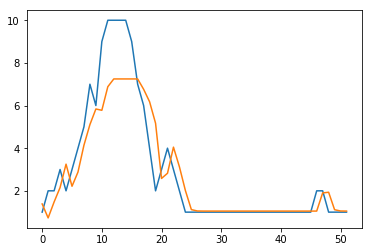

In [142]:
plt.plot(actuals)
plt.plot(pred1)

In [227]:
tempAdd=tempAdd[['WEEKEND', 'ACTIVITY LEVEL', 'temp']]

In [365]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = tempAdd.iloc[:,1:]
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[3]], axis=1, inplace=True)
print(reframed.tail(50))

     var1(t-1)  var2(t-1)   var1(t)
474   0.111111   0.281437  0.111111
475   0.111111   0.437126  0.222222
476   0.222222   0.461078  0.111111
477   0.111111   0.473054  0.222222
478   0.222222   0.263473  0.333333
479   0.333333   0.233533  0.444444
480   0.444444   0.311377  0.666667
481   0.666667   0.053892  0.555556
482   0.555556   0.000000  0.888889
483   0.888889   0.113772  1.000000
484   1.000000   0.431138  1.000000
485   1.000000   0.461078  1.000000
486   1.000000   0.251497  1.000000
487   1.000000   0.179641  0.888889
488   0.888889   0.275449  0.666667
489   0.666667   0.431138  0.555556
490   0.555556   0.371258  0.333333
491   0.333333   0.281437  0.111111
492   0.111111   0.377246  0.222222
493   0.222222   0.347305  0.333333
494   0.333333   0.443114  0.222222
495   0.222222   0.281437  0.111111
496   0.111111   0.371258  0.000000
497   0.000000   0.538922  0.000000
498   0.000000   0.514970  0.000000
499   0.000000   0.790419  0.000000
500   0.000000   0.544910  0

In [366]:
# split into train and test sets
values = reframed.values
nt = len(reframed) - 52
train = values[:nt, :]
test = values[nt:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(471, 1, 2) (471,) (52, 1, 2) (52,)


In [367]:
model = Sequential()
model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=0)

In [368]:
# online forecast
for i in range(len(testX)):
	testX, testy = X[i], y[i]
	testX = testX.reshape(1, 1, 1)
	yhat = model.predict(testX, batch_size=1)
	print('>Expected=%.1f, Predicted=%.1f' % (testy, yhat))


# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.003


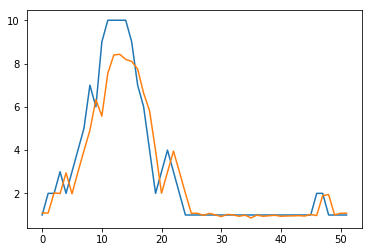

In [369]:
plt.plot(inv_y)
plt.plot(inv_yhat)

In [140]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))

NameError: name 'inv_y' is not defined

1) Test RMSE: 1.043


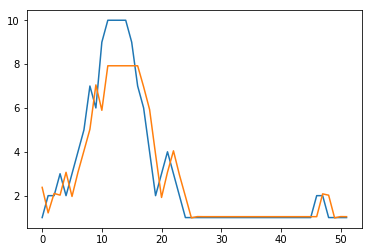

        results
count  1.000000
mean   1.042897
std         NaN
min    1.042897
25%    1.042897
50%    1.042897
75%    1.042897
max    1.042897


In [64]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib
import numpy
import pandas as pd
from numpy import concatenate
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df = df.drop(0)
    return df

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
    new_row = [x for x in X] + [yhat]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]
 
# run a repeated experiment
def experiment(repeats, series):
    # transform data to be stationary
    raw_values = series.values
    diff_values = raw_values
    # transform data to be supervised learning
    supervised = timeseries_to_supervised(diff_values, 1)
    supervised_values = supervised.values
    # split data into train and test-sets
    train, test = supervised_values[0:-52], supervised_values[-52:]
    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)
    # run experiment
    error_scores = list()
    for r in range(repeats):
        # fit the base model
        lstm_model = fit_lstm(train_scaled, 1, 1000, 1)
        # forecast test dataset
        predictions = list()
        for i in range(len(test_scaled)):
            # predict
            X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
            yhat = forecast_lstm(lstm_model, 1, X)
            # invert scaling
            yhat = invert_scale(scaler, X, yhat)
            # invert differencing
            #yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
            # store forecast
            predictions.append(yhat)
        # report performance
        rmse = sqrt(mean_squared_error(raw_values[-52:], predictions))
        print('%d) Test RMSE: %.3f' % (r+1, rmse))
        plt.plot(raw_values[-52:])
        plt.plot(predictions)
        plt.show()
        error_scores.append(rmse)
    return error_scores
 
# execute the experiment
def run():
# load dataset
    series = pd.read_excel('output.xlsx', usecols=[3])
    #experiment
    repeats = 1
    results = DataFrame()
    # run experiment
    results['results'] = experiment(repeats, series)
    # summarize results
    print(results.describe())
    # save results
    results.to_csv('experiment_fixed.csv', index=False)
 
 # entry point
run()

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\

1) Test RMSE: 2.233


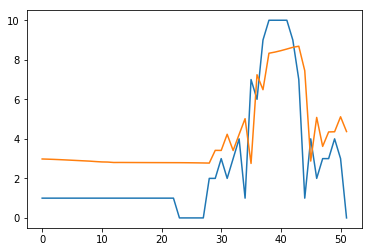

        results
count  1.000000
mean   2.232868
std         NaN
min    2.232868
25%    2.232868
50%    2.232868
75%    2.232868
max    2.232868


In [132]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib
import numpy
import pandas as pd
from numpy import concatenate
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df = df.drop(0)
    return df
 
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
    new_row = [x for x in X] + [yhat]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# Update LSTM model
def update_model(model, train, batch_size, updates):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    for i in range(updates):
        model.fit(X, y, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()

# run a repeated experiment
def experiment(repeats, series, updates):
    # transform data to be stationary
    raw_values = series.values
    diff_values = raw_values
    # transform data to be supervised learning
    supervised = timeseries_to_supervised(diff_values, 1)
    supervised_values = supervised.values
    # split data into train and test-sets
    train, test = supervised_values[0:-52], supervised_values[-52:]
    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)
    # run experiment
    error_scores = list()
    for r in range(repeats):
        # fit the base model
        lstm_model = fit_lstm(train_scaled, 1, 100, 1)
        # forecast test dataset
        train_copy = numpy.copy(train_scaled)
        predictions = list()
        for i in range(len(test_scaled)):
            # update model
            if i > 0:
                update_model(lstm_model, train_copy, 1, updates)
            # predict
            X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
            yhat = forecast_lstm(lstm_model, 1, X)
            # invert scaling
            yhat = invert_scale(scaler, X, yhat)
            # invert differencing
            #yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
            # store forecast
            predictions.append(yhat)
            # add to training set
            train_copy = concatenate((train_copy, test_scaled[i,:].reshape(1, -1)))
        # report performance
        rmse = sqrt(mean_squared_error(raw_values[-52:], predictions))
        print('%d) Test RMSE: %.3f' % (r+1, rmse))
        plt.plot(raw_values[-52:])
        plt.plot(predictions)
        plt.show()
        error_scores.append(rmse)
    return error_scores

# execute the experiment
def run():
    # load dataset
    series = pd.read_excel('Model Dataset_Avg Temp.xlsx', usecols=[1])
    #experiment
    repeats = 1
    results = DataFrame()
    # run experiment
    updates = 20
    results['results'] = experiment(repeats, series, updates)
    # summarize results
    print(results.describe())
    # save results
    results.to_csv('experiment_update_2.csv', index=False)

 # entry point
run()

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


1) Test RMSE: 1.615


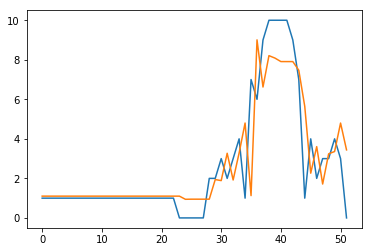

2) Test RMSE: 1.489


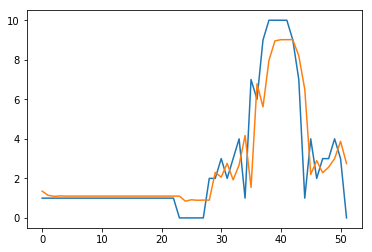

3) Test RMSE: 1.707


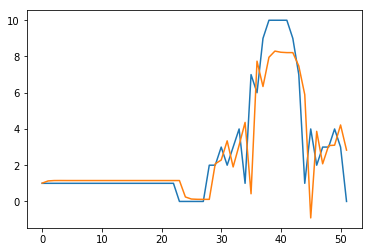

4) Test RMSE: 1.720


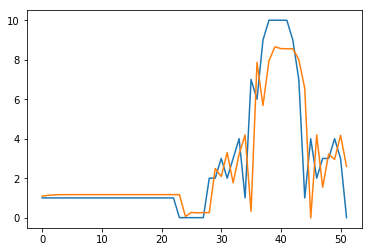

5) Test RMSE: 1.824


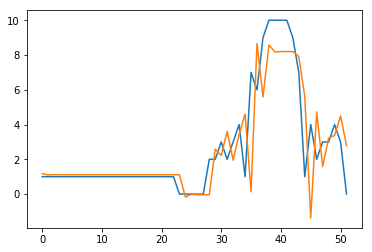

1) Test RMSE: 1.652


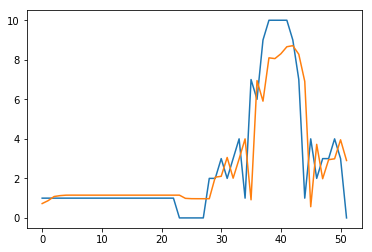

2) Test RMSE: 1.911


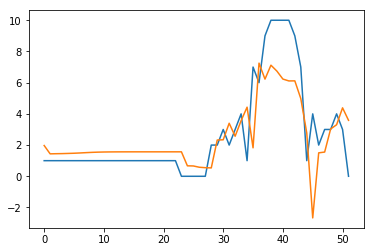

3) Test RMSE: 1.613


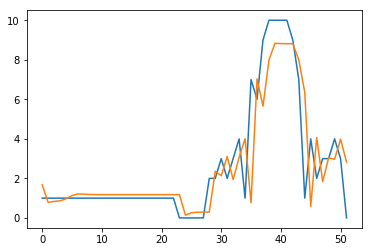

4) Test RMSE: 1.714


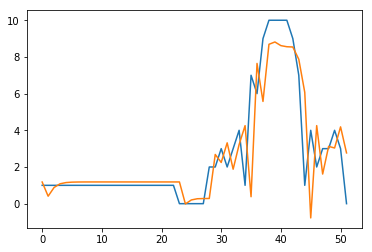

5) Test RMSE: 1.641


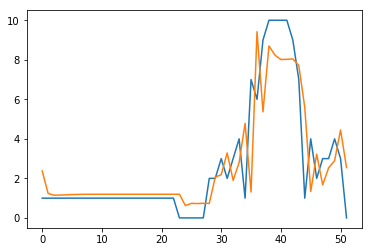

       with-seed  without-seed
count   5.000000      5.000000
mean    1.670887      1.706072
std     0.125686      0.120481
min     1.488968      1.612580
25%     1.615314      1.640595
50%     1.706616      1.652269
75%     1.719933      1.713704
max     1.823606      1.911211


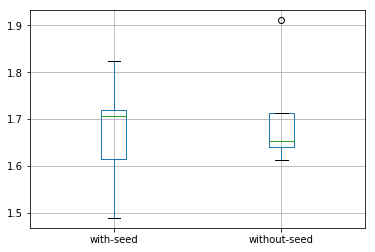

In [77]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline
matplotlib.use('Agg')
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib
import numpy
import pandas as pd
from numpy import concatenate
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df = df.drop(0)
    return df
 
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
    new_row = [x for x in X] + [yhat]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# run a repeated experiment
def experiment(repeats, series, seed):
    # transform data to be stationary
    raw_values = series.values
    diff_values = raw_values
    # transform data to be supervised learning
    supervised = timeseries_to_supervised(diff_values, 1)
    supervised_values = supervised.values
    # split data into train and test-sets
    train, test = supervised_values[0:-52], supervised_values[-52:]
    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)
    # run experiment
    error_scores = list()
    for r in range(repeats):
        # fit the model
        batch_size = 1
        train_trimmed = train_scaled[3:, :]
        lstm_model = fit_lstm(train_trimmed, batch_size, 500, 4)
        # forecast the entire training dataset to build up state for forecasting
        if seed:
            train_reshaped = train_trimmed[:, 0].reshape(len(train_trimmed), 1, 1)
            lstm_model.predict(train_reshaped, batch_size=batch_size)
        # forecast test dataset
        test_reshaped = test_scaled[:,0:-1]
        test_reshaped = test_reshaped.reshape(len(test_reshaped), 1, 1)
        output = lstm_model.predict(test_reshaped, batch_size=batch_size)
        predictions = list()
        for i in range(len(output)):
            yhat = output[i,0]
            X = test_scaled[i, 0:-1]
            # invert scaling
            yhat = invert_scale(scaler, X, yhat)
            # invert differencing
            #yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
            # store forecast
            predictions.append(yhat)
        # report performance
        rmse = sqrt(mean_squared_error(raw_values[-52:], predictions))
        print('%d) Test RMSE: %.3f' % (r+1, rmse))
        plt.plot(raw_values[-52:])
        plt.plot(predictions)
        plt.show()
        error_scores.append(rmse)
    return error_scores


# load dataset
series = pd.read_excel('Model Dataset_Avg Temp.xlsx', usecols=[1])
# experiment
repeats = 5
results = DataFrame()
# with seeding
with_seed = experiment(repeats, series, True)
results['with-seed'] = with_seed
# without seeding
without_seed = experiment(repeats, series, False)
results['without-seed'] = without_seed
# summarize results
print(results.describe())
# save boxplot
results.boxplot()
plt.savefig('boxplot.png')

In [405]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=3):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df
 
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]
 
# load dataset
series = pd.read_excel('output.xlsx', usecols=[3])

In [406]:
raw_values = series.values
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(raw_values, 1)
supervised = supervised[1:]
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-52], supervised_values[-52:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # store forecast
    predictions.append(yhat)

Test RMSE: 1.002


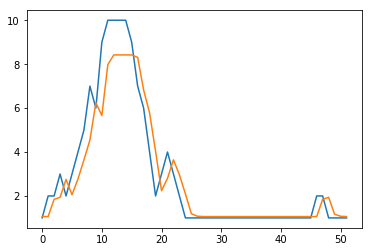

In [407]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-52:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-52:])
pyplot.plot(predictions)
pyplot.show()

In [218]:
lstmIn=pd.DataFrame(data1[-52:])

In [221]:
lstmOut=pd.DataFrame(predictions)

In [222]:
mtsl=pd.merge(lstmIn, lstmOut, left_index=True, right_index=True)

In [223]:
mtsl.to_csv('lstm1.csv', index=False)

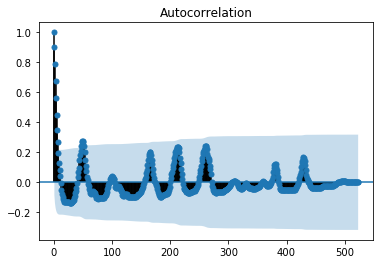

In [124]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
series = pd.read_excel('output.xlsx', usecols=[3])
plot_acf(series)
plt.show()

In [125]:
#ACF shows strong case for an AR model (rapid cutoff of lags)

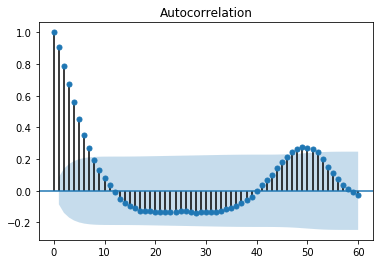

In [126]:
plot_acf(series, lags=60)
plt.show()

In [127]:
#seasonality at around 52 (w/ weekly data, this makes sense)

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


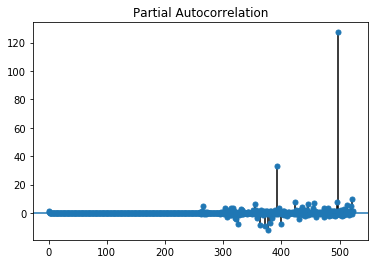

In [128]:
plot_pacf(series)
plt.show()

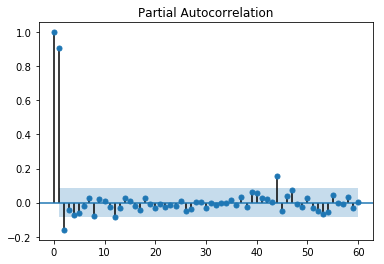

In [130]:
plot_pacf(series, lags=60)
plt.show()

In [111]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(series.values[:,0], autolag='AIC')

In [112]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.827993
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [5]:
##p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
#auto_arima uses adfuller and related methods - decided the series is stationary

In [131]:
from pyramid.arima import auto_arima

stepwise_model = auto_arima(series, start_p=0, start_q=0,max_p=3, max_q=3, m=52,
                           start_P=0, start_Q=0, max_P=3, max_Q=3,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)
print(stepwise_model.aic())

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=2153.912, BIC=2162.435, Fit time=0.017 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=1259.875, BIC=1276.921, Fit time=3.903 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=1670.589, BIC=1687.635, Fit time=2.364 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=1263.783, BIC=1276.568, Fit time=0.055 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 52); AIC=1254.129, BIC=1275.436, Fit time=19.083 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 52); AIC=1253.837, BIC=1279.406, Fit time=42.527 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(3, 0, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 1, 52); AIC=2112.785, BIC=2134.092, Fit time=52.045 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 0, 1, 52); AIC=1243.212, BIC=1273.042, Fit time=53.228 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_

In [283]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
dataframe = pd.read_excel('output.xlsx', usecols=[3])

dataset = dataframe.values
X = dataset.astype('float32')    

# split into train and test sets
train, test = X[:-52], X[-52:]
print(len(train), len(test))

472 52


In [286]:
model = SARIMAX(X,order=(2,0,1),seasonal_order=(2,0,1,52), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=0)

In [288]:
model_fit.plot_predict()

AttributeError: 'SARIMAXResults' object has no attribute 'plot_predict'

In [8]:
#stepwise_model.fit(train)

In [9]:
#future_forecast = stepwise_model.predict(n_periods=len(test))

In [ ]:
#AR
n_train=len(train)
n_records = len(X)
predictions = list()
for i in range(n_train, n_records):
    ttrain = X[0:i]
    model = SARIMAX(ttrain,order=(3,0,0),seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

In [ ]:
#ARMA
n_train=len(train)
n_records = len(X)
predictions = list()
for i in range(n_train, n_records):
    ttrain = X[0:i]
    model = SARIMAX(ttrain,order=(3,0,3),seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

In [ ]:
#SARMA
n_train=len(train)
n_records = len(X)
predictions = list()
for i in range(n_train, n_records):
    ttrain = X[0:i]
    model = SARIMAX(ttrain,order=(3,0,3),seasonal_order=(3,0,0,52), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    print('train status' (ttrain))

In [304]:
#SAR
n_train=52*4
n_records = len(X)
predictions = list()
for i in range(n_train, n_records):
    ttrain = X[0:i]
    model = SARIMAX(ttrain,order=(2,0,1),seasonal_order=(2,0,1,52), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    print('train=%d' % i)

KeyboardInterrupt: 

In [136]:
len(predictions)

53

In [137]:
len(test)

53

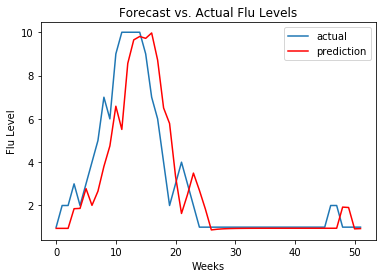

In [138]:
# plot
plt.plot(test[1:], label='actual')
plt.plot(predictions[:-1], color='red', label='prediction')
plt.xlabel('Weeks')
plt.ylabel('Flu Level')
plt.title('Forecast vs. Actual Flu Levels')
plt.legend(loc='best')
plt.show()

In [139]:
from sklearn.metrics import mean_squared_error
import math

testScore = math.sqrt(mean_squared_error(test[1:], predictions[:-1]))
print('Test RMSE: %.2f RMSE' % (testScore))

Test RMSE: 1.43 RMSE


In [140]:
sarIn=pd.DataFrame(test[1:])

In [141]:
sarOut=pd.DataFrame(predictions[:-1])

In [142]:
mm=pd.merge(sarIn, sarOut, right_index=True, left_index=True)

In [143]:
mm.to_csv('sarOut1.csv', index=False)